In [43]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [44]:
def process_data():
    """
    Loads CIFAR-10 dataset then returns the train and test set
    
    Parameters
    ----------
    None

    Returns
    -------
    tuple : (xTrain,yTrain), (xTest,yTest)
        Returns normalized CIFAR-10 train and test data
    """
    
    # Model / data parameters
    num_classes = 10
    input_shape = (36, 36, 1)

    # the data, split between train and test sets
    (xTrain, yTrain), (xTest, yTest) = keras.datasets.mnist.load_data()

    # Scale images to the [0, 1] range
    xTrain = xTrain.astype("float32") / 255
    xTest = xTest.astype("float32") / 255
    # Make sure images have shape (28, 28, 1)
    xTrain = np.expand_dims(xTrain, -1)
    xTest = np.expand_dims(xTest, -1)
    print("xTrain shape:", xTrain.shape)
    print(xTrain.shape[0], "train samples")
    print(xTest.shape[0], "test samples")
    
    return xTrain, yTrain, xTest, yTest

In [45]:
def train_model(xTrain):
    """
    Train model with covnets, using sequential model
    
    Parameters
    ----------
    xTrain:tensor
        Training tensor set containing the loaded and processed CIFAR10 data

    Returns
    -------
    model : keras.engine.sequential.Sequential
        the feature cconvolutional 
    """
    
    model = tf.keras.Sequential(
        [
            layers.Conv2D(filters = 64, kernel_size = (3,3), activation = "relu", input_shape = xTrain.shape[1:]),
            layers.MaxPooling2D(pool_size = (2,2)),

            layers.Conv2D(filters = 128, kernel_size = (3,3), activation = "relu"),
            layers.MaxPooling2D(pool_size = (2,2)),

            layers.Flatten(),
            layers.Dropout(0.5),
            layers.Dense(128),
            layers.Activation("relu"),

            #Softmax output, appropriate for multilabel CV problem
            layers.Dense(10),
            layers.Activation("softmax"),
        ]
        
    )

    return model

In [46]:
def plot_data(historyTrain, EPOCHS, model, xTest, yTest):
    """
    Continue from here
    plots training loss and accuraccy
    
    Parameters
    ----------
    historyTrain : keras.callbacks.History
    EPOCHS : int
    model : keras.engine.sequential.Sequential
        the feature cconvolutional 
    xTrain: tensor
    yTrain: tensor

    Returns
    -------
    None
    """

    lossTrain = historyTrain.history['loss']
    accTrain = historyTrain.history['accuracy']
    epochs = range(1, EPOCHS+1)


    plt.plot(epochs, lossTrain, 'g', label='Training Loss')
    plt.title('Training Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    plt.plot(epochs, accTrain, 'b', label='Training Accuracy')
    plt.title('Training Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    valLoss, valAcc = model.evaluate(xTest, yTest)
    print("Validation loss: ", valLoss, "\nValidation Accuracy: ", valAcc*100, "%")

In [47]:
def main():
    """
    Continue from here
    plots training loss and accuraccy
    
    Parameters
    ----------
    None

    Returns
    -------
    None
    """

    BATCH_SIZE = 128
    EPOCHS = 15
    
    xTrain, yTrain, xTest, yTest = process_data()
    
    model = train_model(xTrain)

    model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

    historyTrain = model.fit(xTrain, yTrain, batch_size = BATCH_SIZE, epochs = EPOCHS)
    
    score = model.evaluate(xTest, yTest, verbose = 0)
    
    plot_data(historyTrain, EPOCHS, model, xTest, yTest)
    
    print("Test loss:", score[0])
    print("Test accuracy:", score[1])



xTrain shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Epoch 1/15
469/469 [==============================] - 34s 71ms/step - loss: 0.1918 - accuracy: 0.9407
Epoch 2/15
469/469 [==============================] - 33s 71ms/step - loss: 0.0619 - accuracy: 0.9807
Epoch 3/15
469/469 [==============================] - 33s 71ms/step - loss: 0.0469 - accuracy: 0.9853
Epoch 4/15
469/469 [==============================] - 33s 71ms/step - loss: 0.0366 - accuracy: 0.9884
Epoch 5/15
469/469 [==============================] - 33s 71ms/step - loss: 0.0309 - accuracy: 0.9905
Epoch 6/15
469/469 [==============================] - 34s 72ms/step - loss: 0.0282 - accuracy: 0.9909
Epoch 7/15
469/469 [==============================] - 34s 72ms/step - loss: 0.0242 - accuracy: 0.9922
Epoch 8/15
469/469 [==============================] - 34s 72ms/step - loss: 0.0220 - accuracy: 0.9927
Epoch 9/15
469/469 [==============================] - 33s 71ms/step - loss: 0.0193 - accuracy: 0.9937
Epoch 10/1

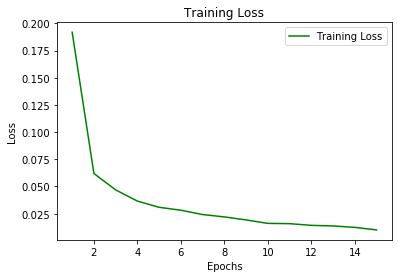

NameError: name 'accTrain' is not defined

In [48]:
main()